<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/08_deep_learning/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans cet exemple, nous allons entrainer GAN (generative adversarial network) sur les données Fashion Minist, lesquels contiennent plusieurs images de vêtements (pantalons, chandails, souliers).

Vous pouvez consulter le lien suivant pour tous les détails sur ce jeu de données:
https://www.tensorflow.org/datasets/catalog/fashion_mnist

1. Importation des packages utiles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers, models, datasets, callbacks, Sequential
import tensorflow.keras.backend as K

from sklearn.model_selection import train_test_split

2. Importer les données

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


3. Pré-processing des images (normalisation et reshape des images)

In [ ]:
def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0
    #imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    #imgs = np.expand_dims(imgs, -1)
    return imgs

X_train = preprocess(X_train)
X_test = preprocess(X_test)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


4. Définir le GAN

In [ ]:
codings_size = 30

generator = Sequential([
    layers.Dense(100, activation="selu", input_shape=[codings_size]),
    layers.Dense(150, activation="selu"),
    layers.Dense(28 * 28, activation="sigmoid"),
    layers.Reshape([28, 28])
])
discriminator = Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(150, activation="selu"),
    layers.Dense(100, activation="selu"),
    layers.Dense(1, activation="sigmoid")
])
gan = models.Sequential([generator, discriminator])

5. Compiler le modèle

NOTE: on doit avoir l'instruction discriminator.trainable = False pour ne pas entrainer le générateur et le discrimunateur simultanément

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

6. Faire un shuffle des données pour mélanger les observations (originalement ordonnées)

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

7. Fonction pour tracer afficher quelques images

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

8. Fonction pour entrainer le GAN

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 - entrainer le discriminateur
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - entrainer le générateur
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

8. Entrainer le modèle (on commence par une seule apoch pour voir)

Epoch 1/1


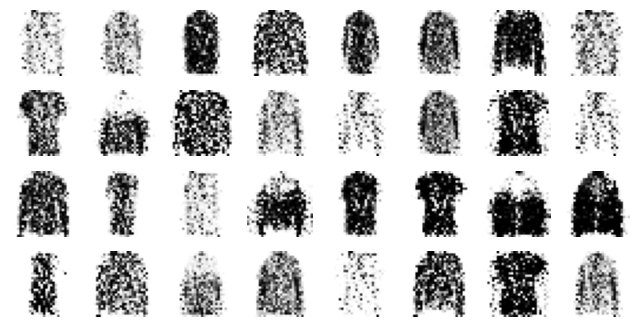

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

9. Utiliser le générateur pour générer de nouvelles images

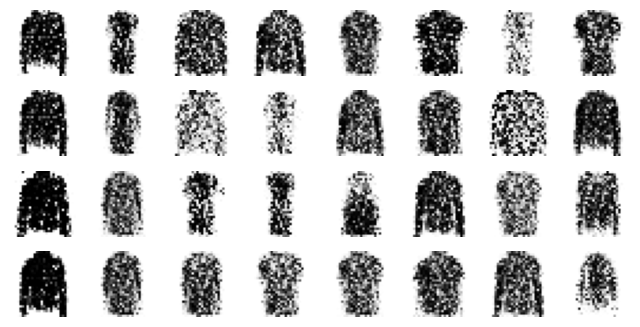

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

#On simule des nombres aléatoires
noise = tf.random.normal(shape=[batch_size, codings_size])

#On entre les nombres aléatoires simulés dans le générateur pour produire les images
generated_images = generator(noise)

#On affiche les images
plot_multiple_images(generated_images, 8)

10. On entraine le modèle avec 25 epochs

Epoch 1/50


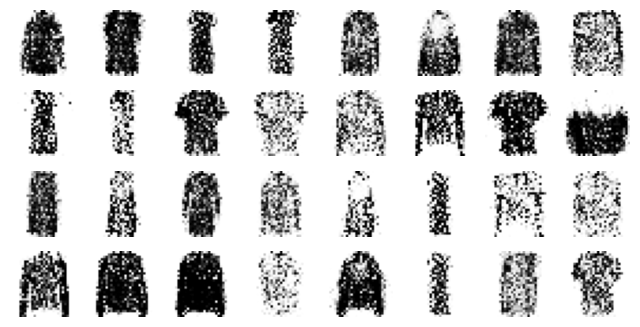

Epoch 2/50


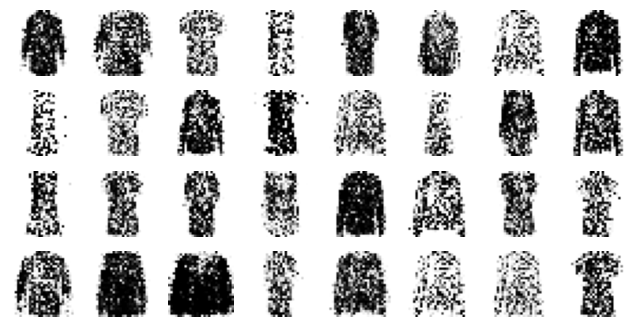

Epoch 3/50


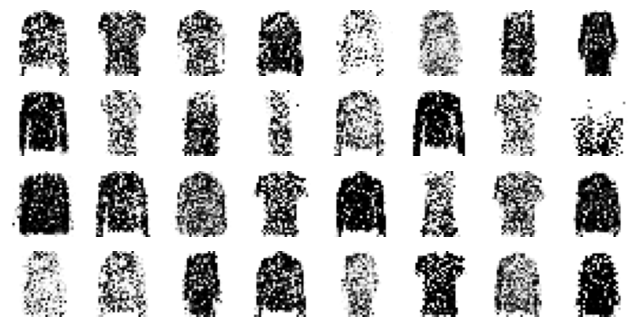

Epoch 4/50


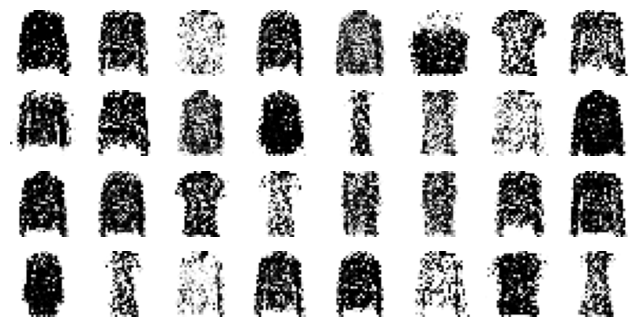

Epoch 5/50


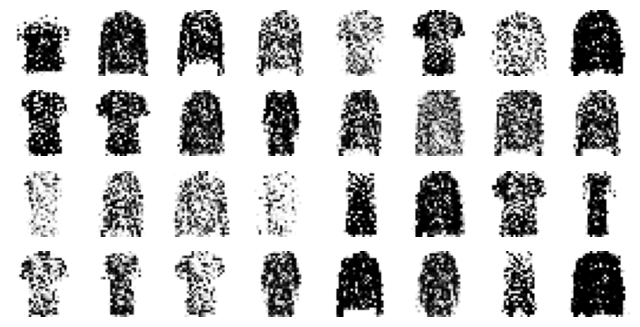

Epoch 6/50


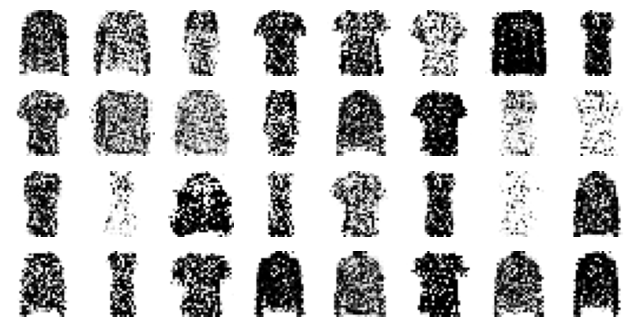

Epoch 7/50


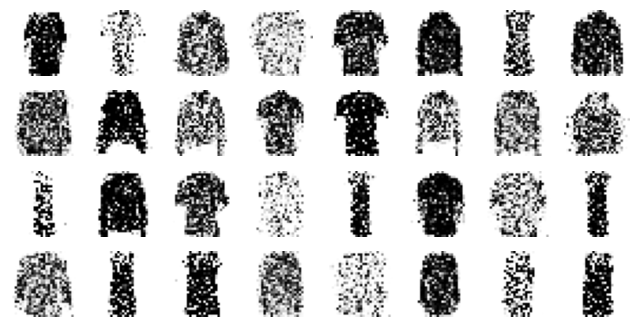

Epoch 8/50


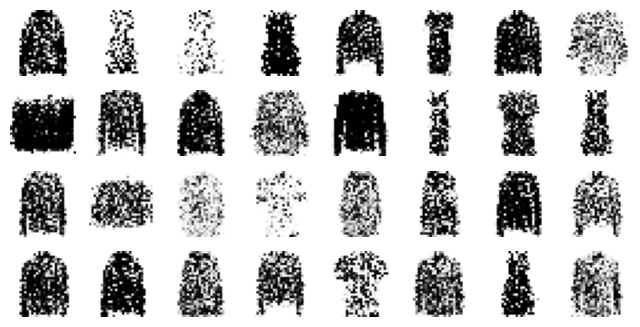

Epoch 9/50


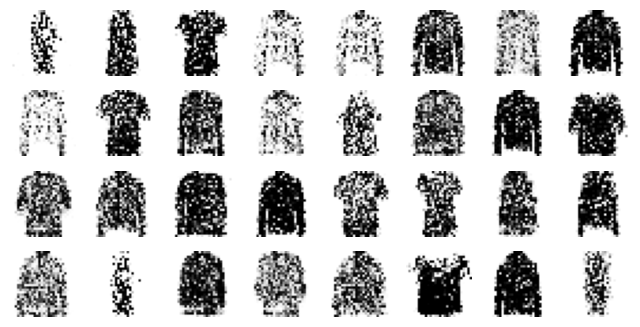

Epoch 10/50


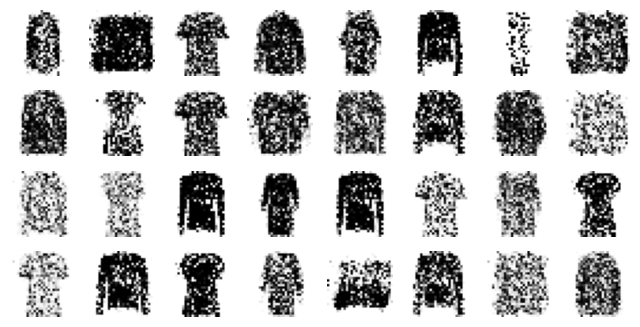

Epoch 11/50


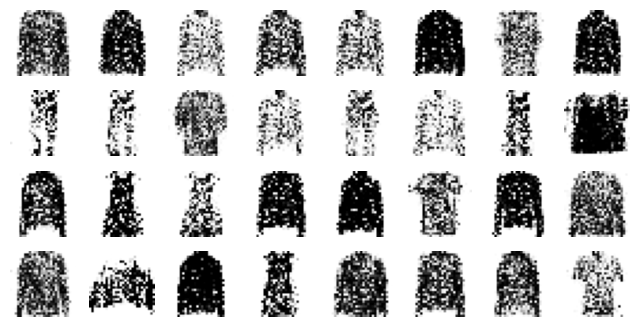

Epoch 12/50


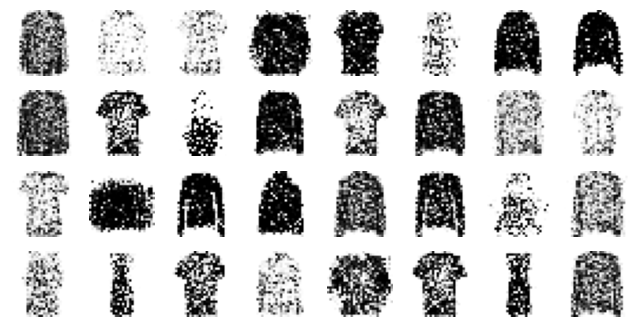

Epoch 13/50


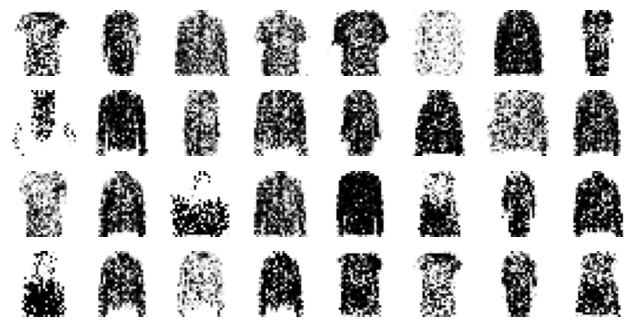

Epoch 14/50


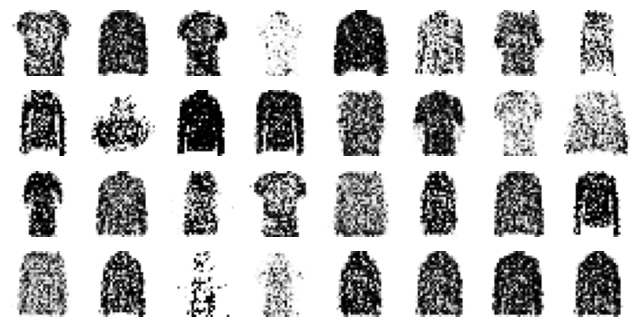

Epoch 15/50


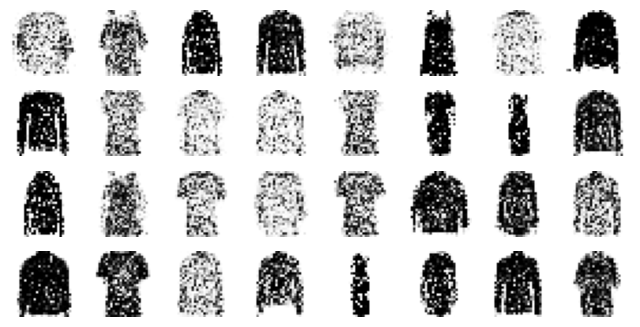

Epoch 16/50


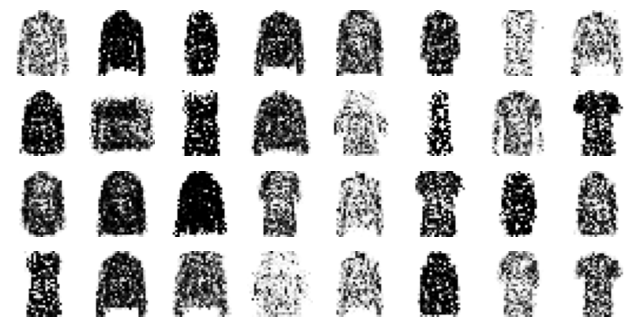

Epoch 17/50


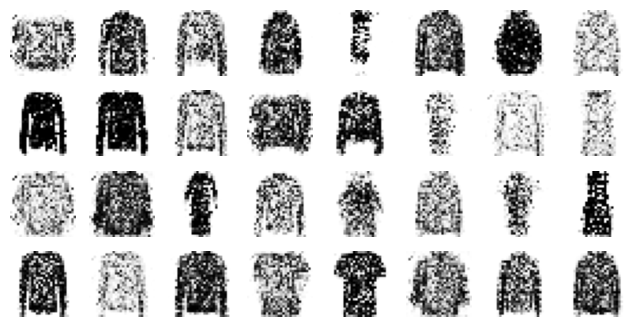

Epoch 18/50


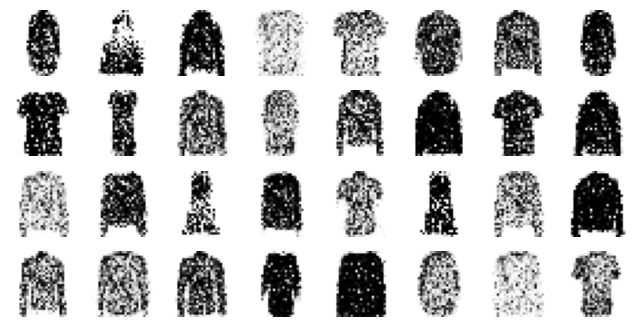

Epoch 19/50


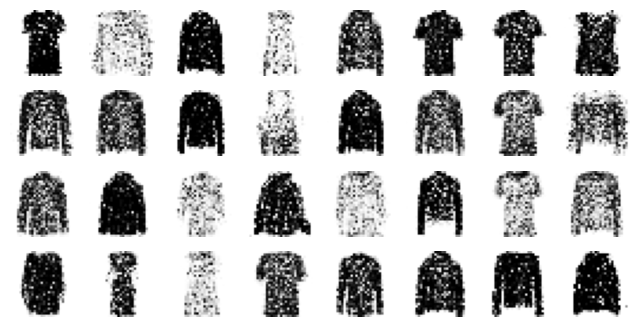

Epoch 20/50


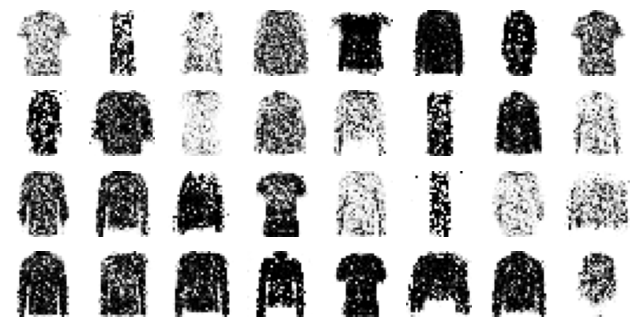

Epoch 21/50


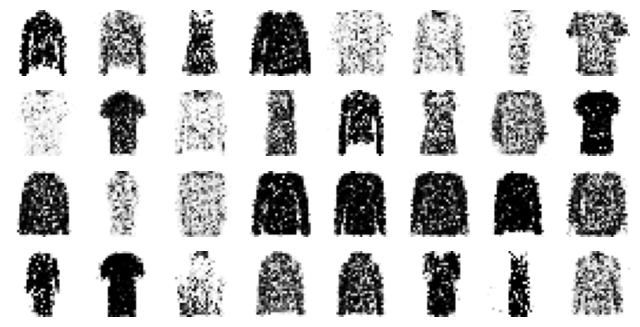

Epoch 22/50


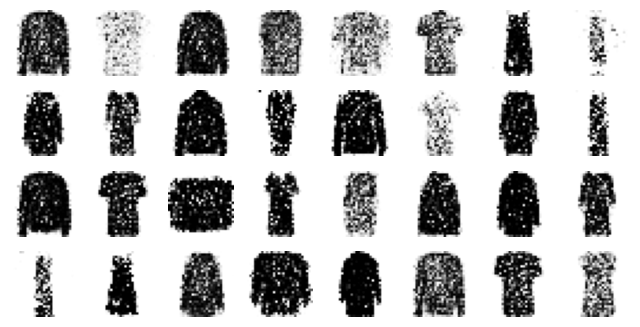

Epoch 23/50


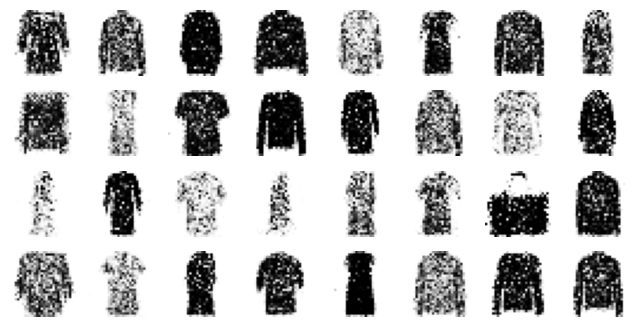

Epoch 24/50


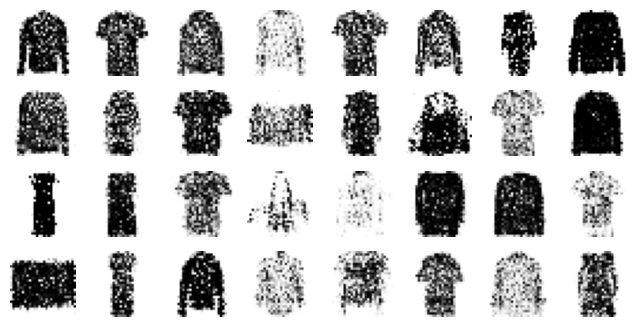

Epoch 25/50


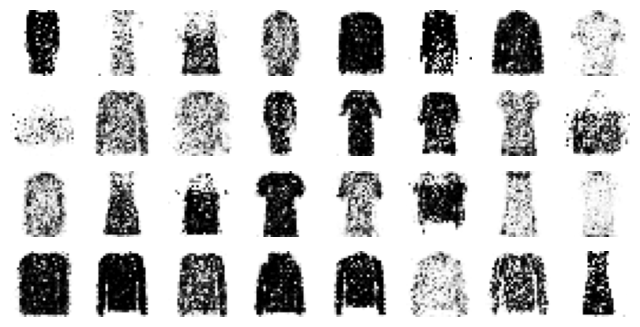

Epoch 26/50


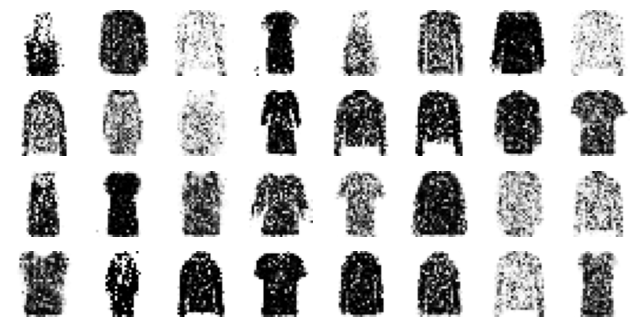

Epoch 27/50


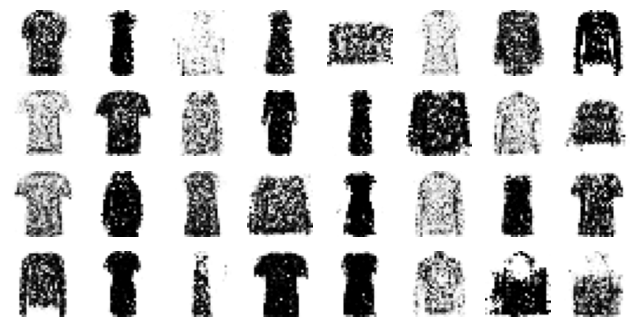

Epoch 28/50


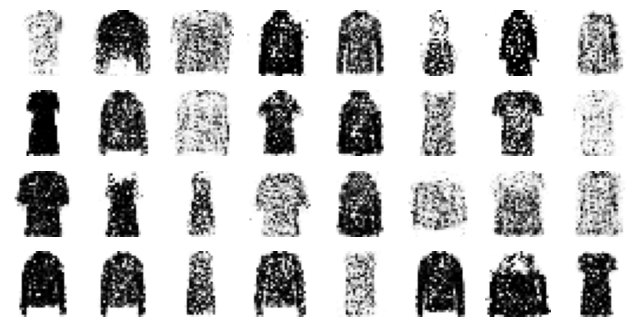

Epoch 29/50


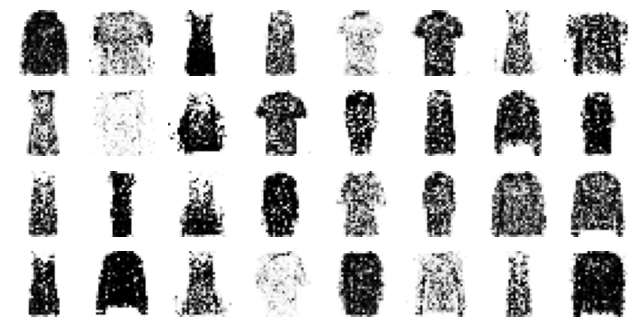

Epoch 30/50


In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=25)